## Part-1

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
#Importing the data
import pandas as pd
df=pd.read_csv(r"/Users/priyathambikumalla/Desktop/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Checking missing values or Null Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Determaining Input and Output Columns
X=df.drop(columns=['Outcome'])
y=df["Outcome"]

In [6]:
# Scaling data using standard scaler
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [7]:
print(X_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [12]:
#Split the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=150)


for 1 neighbours the accuracy is 0.6753246753246753
for 2 neighbours the accuracy is 0.7272727272727273
for 3 neighbours the accuracy is 0.7012987012987013
for 4 neighbours the accuracy is 0.7467532467532467
for 5 neighbours the accuracy is 0.7142857142857143
for 6 neighbours the accuracy is 0.7207792207792207
for 7 neighbours the accuracy is 0.7077922077922078
for 8 neighbours the accuracy is 0.7272727272727273
for 9 neighbours the accuracy is 0.7467532467532467
for 10 neighbours the accuracy is 0.7662337662337663
for 11 neighbours the accuracy is 0.7272727272727273
for 12 neighbours the accuracy is 0.7467532467532467
for 13 neighbours the accuracy is 0.7272727272727273
for 14 neighbours the accuracy is 0.7272727272727273
for 15 neighbours the accuracy is 0.7207792207792207
for 16 neighbours the accuracy is 0.7077922077922078
for 17 neighbours the accuracy is 0.7207792207792207
for 18 neighbours the accuracy is 0.7467532467532467
for 19 neighbours the accuracy is 0.7272727272727273
fo

Text(0, 0.5, 'Accuracy')

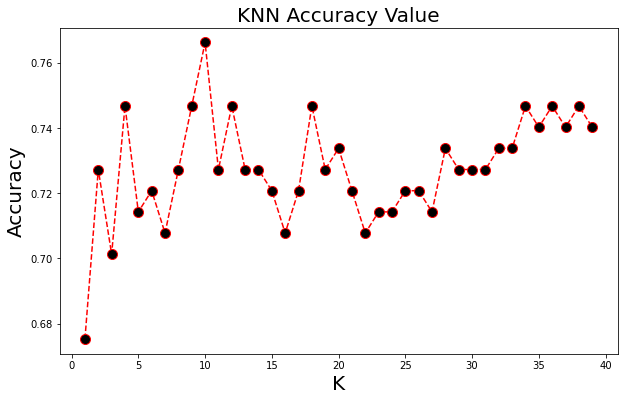

In [13]:
from sklearn import metrics
acc=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat=knn.predict(X_test)
    acc.append(knn.score(X_test,y_test))
    print("for {} neighbours the accuracy is {}".format(i,acc[i-1]))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='red',linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('KNN Accuracy Value',fontsize=20)
plt.xlabel('K',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)

The Best K Value is 10

In [25]:

best_model=KNeighborsClassifier(n_neighbors=10)
best_model.fit(X_train,y_train)
pred_val=best_model.predict(X_test)

In [29]:
#Running 5 Fold Cross Validations
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(best_model,X,y,cv=5)
print("five cross validation scores",cv_score)
print(" Standard deviation of five cross validation scores",cv_score.std())
print("Mean of cross validation score",cv_score.mean())

five cross validation scores [0.74675325 0.72077922 0.75974026 0.78431373 0.7124183 ]
 Standard deviation of five cross validation scores 0.02613018682870626
Mean of cross validation score 0.7448009506833035


In [34]:
con_mat=confusion_matrix(y_test,pred_val)
print(con_mat)
acc_score=accuracy_score(y_test,pred_val)
print(acc_score)

[[87 15]
 [21 31]]
0.7662337662337663


In [35]:
print("Mean of the model :",cv_score.mean())
print("Standard deviation of the model :",cv_score.std())

Mean of the model : 0.7448009506833035
Standard deviation of the model : 0.02613018682870626


Accuracy of the Model:
we got an accuracy of 76% at n_neighbours=10 As we can see the model performed better with 10 neighbors and mean of the five cross-validation scores is 74% which means the model is performing better and by looking into the confusion matrix we have correctly predicted 118 classes out of 154 

## Part-2

In [42]:
#Splitting Dataset
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target="Outcome", 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

In [43]:
#Classifiers :GaussianNB, MultinomialNB, BernouliNB
classifiers={
    "GaussianNB":GaussianNB(),
    "MultinomialNB":MultinomialNB(),
    "BernoulliNB":BernoulliNB()
}

In [44]:
for name,model_nb in classifiers.items():
    model_nb.fit(X_train,y_train)
    pred_nb=model_nb.predict(X_test)
    cv_scores_nb=cross_val_score(model_nb,X_valid,y_valid,cv=5)
    print(f"{name}:")
    print("cross_validation scores on validation data :",cv_scores_nb)
    print("mean of accuracy :",cv_scores_nb.mean())
    print("Standard deviation of accuracy :",cv_scores_nb.std())
    print("Accuracy on test Data :",accuracy_score(y_test,pred_nb))
    print("===============================================================================")

GaussianNB:
cross_validation scores on validation data : [0.6875     0.6875     0.86666667 0.8        0.8       ]
mean of accuracy : 0.7683333333333333
Standard deviation of accuracy : 0.07034636530135095
Accuracy on test Data : 0.7402597402597403
MultinomialNB:
cross_validation scores on validation data : [0.6875     0.4375     0.53333333 0.6        0.46666667]
mean of accuracy : 0.545
Standard deviation of accuracy : 0.0907300636197531
Accuracy on test Data : 0.6233766233766234
BernoulliNB:
cross_validation scores on validation data : [0.75       0.625      0.73333333 0.73333333 0.66666667]
mean of accuracy : 0.7016666666666667
Standard deviation of accuracy : 0.047842333648024406
Accuracy on test Data : 0.7012987012987013


GaussianNB:
Gaussian Naive Bayes (GNB) is a classification technique based on the probabilistic approach and Gaussian distribution. Gaussian Naive Bayes assumes that each parameter has an independent capacity of predicting the output variable. So, the dataset has continuous values and each feature is directly correlated to the dependent variable. The 5-fold-cross-validation mean is 76% and the accuracy on test data is 74% it clearly shows that the model is performing really well.


MultinomialNB:
Multinomial classification is the problem of classifying instances into one of three or more classes. So, the dataset has continuous values and each feature is directly correlated to the dependent variable. The 5-fold-cross-validation mean is 54% and the accuracy on test data is 62% it clearly shows that the model is not performing well for the data. And this MultinomialNB is the least performing model and has a high standard deviation among these 3 models.


BernoulliNB:
BernoulliNB is designed for binary data(0,1). But our Dataset has continuous values by which our BernoulliNB will not perform well. The 5-fold-cross-validation mean is 70% and the accuracy on test data is 70% 


Conclusion:
Based on the results of the above 3 models we can clearly say that the GaussianNB model is performing really well on both validation and test_data.

## Part-3

In [62]:
# To Create Leave-One-Out object
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=loo)
gnb.fit(X_train, y_train)
gnb_mean_score = gnb_scores.mean()
gnb_std_score = gnb_scores.std()
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

#Knn
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_scaled, y, cv=loo)
knn.fit(X_train, y_train)
knn_mean = scores.mean()
knn_std = scores.std()
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [50]:
# To Print mean and standard deviation scores
print("Gaussian Naive Bayes")
print("Mean score: ", gnb_mean_score)
print("Standard deviation: ", gnb_std_score)
print("Accuracy:", gnb_accuracy)
print("")

print("KNN")
print("Mean score: ", knn_mean)
print("Standard deviation: ", knn_std)
print("Accuracy:", knn_accuracy)

Gaussian Naive Bayes
Mean score:  0.75390625
Standard deviation:  0.4307338113161509
Accuracy: 0.7402597402597403

KNN
Mean score:  0.7421875
Standard deviation:  0.43743023997404434
Accuracy: 0.7142857142857143


Yes, I noticed a change in accuracy with the LeaveOneOut cross validation method. This method works well when we have a large amount of data, but in our case, we can see a decrease in accuracy and an increase in standard deviation. This means that the model is not capturing the required information on the training set. As a result, in our scenario, this cross validation strategy is not the best option.

## Part-4

In [58]:
from sklearn.metrics import accuracy_score

#KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# To Print the accuracy scores
print("KNN accuracy is: ", knn_accuracy)
print("Naive Bayes accuracy is: ", nb_accuracy)

KNN accuracy is:  0.7142857142857143
Naive Bayes accuracy is:  0.7402597402597403


In [60]:
# To check the best model for entire dataset
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Accuracy on entire dataset is: {:.3f}".format(nb_accuracy))

Accuracy on entire dataset is: 0.740


According to the findings of the analysis, KNN and GausianNB perform well for this dataset. Nonetheless, there was a little change in the accuracy and standard deviation. 
The mean accuracy of the KNeighborsClassifier is 71%, whereas the GaussianNB model has a mean accuracy of 74% so We may conclude that GaussianNB model is best. 
The KNN model is highly computational, and the dataset must be clear of outliers before we can declare that the model is efficient. But Naive Bayes classifiers are based on strong assumptions about feature independence and data distribution.

In [63]:
# To check the best model for entire dataset
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Accuracy on entire dataset: {:.3f}".format(nb_accuracy))

Accuracy on entire dataset: 0.740
